In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

df = pd.read_csv('Teesta_20220114.csv');
df["x"] = df["ID"];
df["t"] = df["Date"].map(pd.Timestamp);
df = df[df["Indicator"] == "MNDWI"]; # Ignore NDWI

# df = df[["x", "t", "Braiding", "AREA"]]
dfg = df.groupby(["x", "t"]).mean().reset_index(); # Wow!

To inspect:  139


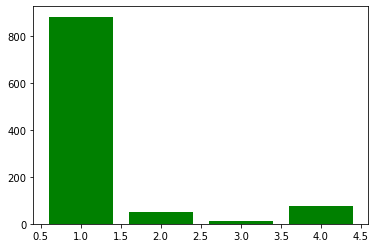

In [9]:
# Inspect data:

# df = pd.read_csv('Teesta_20220114.csv');
# df["x"] = df["ID"];
# df["t"] = df["Date"].map(pd.Timestamp); #.map(lambda x: date_to_ut(x));
# df = df[df["Indicator"] == "MNDWI"]; # Ignore NDWI
# df = df[["x", "t", "Braiding", "AREA"]]
# grouped_df = df.groupby(["x", "t"]);
# # Get histogram!
# sizes = {};
# for key, item in grouped_df:
#     if not item.shape[0] in sizes:
#         sizes[item.shape[0]] = 0;
#     sizes[item.shape[0]] += 1;
# plt.figure();
# plt.bar(sizes.keys(), sizes.values(), color='g')


# with open("Teesta_Mismatch_Braiding.txt", "w") as f:
#     for key, item in grouped_df:
#         if(item.shape[0] <= 1):
#             continue;
#         # Q1 = item['Braiding'].quantile(0.25);
#         # Q3 = item['Braiding'].quantile(0.75);
#         # IQR = Q3 - Q1;
#         # lower_lim = Q1 - 1.5 * IQR;
#         # upper_lim = Q3 + 1.5 * IQR;
#         # outliers_low = item['Braiding'] < lower_lim;
#         # outliers_high = item['Braiding'] > upper_lim;
#         # filter_items = item['Braiding'][~(outliers_low | outliers_high)];
#         # if(filter_items.shape[0] == 0):
#         # f.write(f"{lower_lim} - {upper_lim}")

#         # If min/max braiding differ by more than 1...
#         if(item['Braiding'].max() - item['Braiding'].min() >= 5.0):
#             f.write(f"{item}\n\n");

# with open("Teesta_Mismatch_Area.txt", "w") as f:
#     for key, item in grouped_df:
#         if(item.shape[0] <= 1):
#             continue;
#         # Q1 = item['Braiding'].quantile(0.25);
#         # Q3 = item['Braiding'].quantile(0.75);
#         # IQR = Q3 - Q1;
#         # lower_lim = Q1 - 1.5 * IQR;
#         # upper_lim = Q3 + 1.5 * IQR;
#         # outliers_low = item['Braiding'] < lower_lim;
#         # outliers_high = item['Braiding'] > upper_lim;
#         # filter_items = item['Braiding'][~(outliers_low | outliers_high)];
#         # if(filter_items.shape[0] == 0):
#         # f.write(f"{lower_lim} - {upper_lim}")

#         # If min/max area differ by 1e6
#         if(item['AREA'].max() - item['AREA'].min() >= 5e6):
#             f.write(f"{item}\n\n");

# sizes[1] = 0;
# print("To inspect: ", sum(list(sizes.values())));

# # How do I go about throwing away useless values?


Text(0.5, 1.0, 'Braiding')

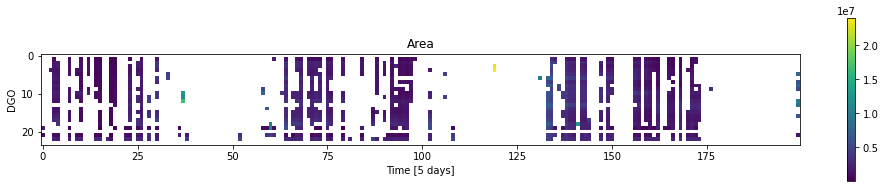

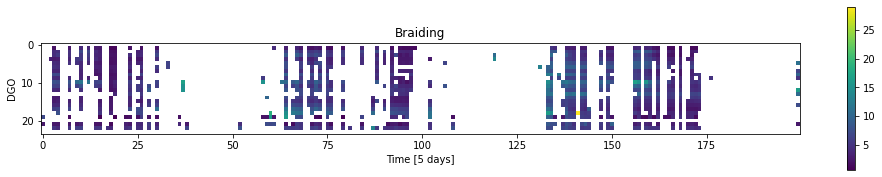

In [2]:
# Plot some sort of matrix of our data...
def process_frame(dfg, param="AREA"):
    start_times = np.full(24, np.inf);
    end_times = np.full(24, -1*np.inf);
    for x in range(1, 24):
        xf = dfg[dfg["x"] == x];
        ts = xf["t"].map(lambda t: (t - pd.Timestamp("1970-01-01")) // pd.Timedelta('1d')).to_numpy();
        if(len(ts) > 0):
            start_times[x] = ts[0];
            end_times[x] = ts[-1];
    start_time = int(np.min(start_times));
    end_time = int(np.max(end_times));
    time_count = end_time-start_time;
    Z = np.full((24, time_count//5+1), np.nan);
    # print(Z.shape)
    for x in range(1, 24):
        xf = dfg[dfg["x"] == x];
        for k, v in xf[["t", param]].iterrows():
            t = int((v["t"] - pd.Timestamp("1970-01-01"))//pd.Timedelta('1d')) - start_time;
            t = t//5;
            Z[x, t] = v[param];
    return Z;

Z_area = process_frame(dfg, "AREA");

plt.figure(figsize=(17,3))
plt.imshow(Z_area, interpolation='none')
plt.colorbar()
# TODO: COLOR BARS
plt.xlabel('Time [5 days]');
plt.ylabel('DGO')
plt.title('Area')

Z_braiding = process_frame(dfg, "Braiding");

plt.figure(figsize=(17,3))
plt.imshow(Z_braiding, interpolation='none')
plt.colorbar()
# TODO: COLOR BARS
plt.xlabel('Time [5 days]');
plt.ylabel('DGO')
plt.title('Braiding')